<a href="https://colab.research.google.com/github/aksha1234/akshay-/blob/master/Assignement_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

<font size =5> Q-4

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2. Loading Dataset

In [4]:
## Uploading the following xlsx files from the github repository to Colab 
! git clone https://github.com/aksha1234/assignment_1.git

fatal: destination path 'assignment_1' already exists and is not an empty directory.


In [4]:
path='/content/assignment_1/car_following (1).xlsx'
df=pd.read_excel(path)

In [ ]:
df

,Time,"v(t,i-1)","x(t,i-1)","x(t,i)"
0,0,0,5000,-102.0
1,1,0,5000,NaN
2,2,0,5000,NaN
3,3,0,5000,NaN
4,4,0,5000,NaN
...,...,...,...,...
496,496,0,8762,NaN
497,497,0,8762,NaN
498,498,0,8762,NaN
499,499,0,8762,NaN


## Reassigning the name to the columns

In [ ]:
df.columns=['time','v_(i-1)','x_(i-1)','x_i']

In [ ]:
df

,time,v_(i-1),x_(i-1),x_i
0,0,0,5000,-102.0
1,1,0,5000,NaN
2,2,0,5000,NaN
3,3,0,5000,NaN
4,4,0,5000,NaN
...,...,...,...,...
496,496,0,8762,NaN
497,497,0,8762,NaN
498,498,0,8762,NaN
499,499,0,8762,NaN


## Assigning the lower and higher acce;ration with the desired speed.

In [ ]:
a_higher=4
a_lower=-6
v_desired=30

## Creating the table for all the 10 vehicles.

In [ ]:
## taking dummy varibles to create the columns for all the 10 vehicles.
sam={}
for value in range(0,10):
  sam[value]=['x_i'+str(value),'s_i'+str(value),'s_imin'+str(value),'v_i'+str(value)]
  

In [ ]:
data=[]
for val in sam:
  for items in sam[val]:
    data.append(items)

In [ ]:
data;

In [ ]:
## Joining the existing table with the new columns of the 10 vehicles.
df=pd.concat([df.drop(columns=['x_i'],axis=1),pd.DataFrame(columns=data)])

In [ ]:
df

,time,v_(i-1),x_(i-1),x_i0,s_i0,s_imin0,v_i0,x_i1,s_i1,s_imin1,v_i1,x_i2,s_i2,s_imin2,v_i2,x_i3,s_i3,s_imin3,v_i3,x_i4,s_i4,s_imin4,v_i4,x_i5,s_i5,s_imin5,v_i5,x_i6,s_i6,s_imin6,v_i6,x_i7,s_i7,s_imin7,v_i7,x_i8,s_i8,s_imin8,v_i8,x_i9,s_i9,s_imin9,v_i9
0,0.0,0.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,0.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,0.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,497.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,498.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,499.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating the variables for the new columns added i.e for all the 10 vehicles. 

In [ ]:

new_cols=df.columns[3:]

In [ ]:
new_cols

Index(['x_i0', 's_i0', 's_imin0', 'v_i0', 'x_i1', 's_i1', 's_imin1', 'v_i1',
       'x_i2', 's_i2', 's_imin2', 'v_i2', 'x_i3', 's_i3', 's_imin3', 'v_i3',
       'x_i4', 's_i4', 's_imin4', 'v_i4', 'x_i5', 's_i5', 's_imin5', 'v_i5',
       'x_i6', 's_i6', 's_imin6', 'v_i6', 'x_i7', 's_i7', 's_imin7', 'v_i7',
       'x_i8', 's_i8', 's_imin8', 'v_i8', 'x_i9', 's_i9', 's_imin9', 'v_i9'],
      dtype='object')

In [ ]:
df[new_cols]=0

In [ ]:
## Assigning the 2nd car car start @ -102 m with the spacing of 100 m.
i=-102
for cols in df.columns[df.columns.str.startswith('x_i')]:
  df[cols][0]=i
  i=i-100

In [ ]:
df

,time,v_(i-1),x_(i-1),x_i0,s_i0,s_imin0,v_i0,x_i1,s_i1,s_imin1,v_i1,x_i2,s_i2,s_imin2,v_i2,x_i3,s_i3,s_imin3,v_i3,x_i4,s_i4,s_imin4,v_i4,x_i5,s_i5,s_imin5,v_i5,x_i6,s_i6,s_imin6,v_i6,x_i7,s_i7,s_imin7,v_i7,x_i8,s_i8,s_imin8,v_i8,x_i9,s_i9,s_imin9,v_i9
0,0.0,0.0,5000.0,-102,0,0,0,-202,0,0,0,-302,0,0,0,-402,0,0,0,-502,0,0,0,-602,0,0,0,-702,0,0,0,-802,0,0,0,-902,0,0,0,-1002,0,0,0
1,1.0,0.0,5000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,0.0,5000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,0.0,5000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.0,0.0,5000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496.0,0.0,8762.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
497,497.0,0.0,8762.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,498.0,0.0,8762.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499,499.0,0.0,8762.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Applying the Discrete Time Simulation of Pipes Model

In [ ]:
## for the first vehicle we have :
for value in range(0,10):
  if value == 0:
    for rows in range(1,df.shape[0]):
      df['s_i'+str(value)][rows]=df['x_(i-1)'][rows-1]-df['x_i'+str(value)][rows-1]
      df['s_imin'+str(value)][rows]=6*(((df['v_i'+str(value)][rows-1])/4.47)+1)
      if df['s_i'+str(value)][rows] < df['s_imin'+str(value)][rows]:
        df['v_i'+str(value)][rows]=max(0,df['v_i'+str(value)][rows-1]+a_lower*1)
      else:
        df['v_i'+str(value)][rows]=min(v_desired,df['v_i'+str(value)][rows-1]+a_higher*1)
      df['x_i'+str(value)][rows]=df['x_i'+str(value)][rows-1]+df['v_i'+str(value)][rows]*1
  else :
    for rows in range(1,df.shape[0]):
      df['s_i'+str(value)][rows]=df['x_i'+str(value-1)][rows-1]-df['x_i'+str(value)][rows-1]
      df['s_imin'+str(value)][rows]=6*(((df['v_i'+str(value)][rows-1])/4.47)+1)
      if df['s_i'+str(value)][rows] < df['s_imin'+str(value)][rows]:
        df['v_i'+str(value)][rows]=max(0,df['v_i'+str(value)][rows-1]+a_lower*1)
      else:
        df['v_i'+str(value)][rows]=min(v_desired,df['v_i'+str(value)][rows-1]+a_higher*1)
      df['x_i'+str(value)][rows]=df['x_i'+str(value)][rows-1]+df['v_i'+str(value)][rows]*1

In [ ]:
df

,time,v_(i-1),x_(i-1),x_i0,s_i0,s_imin0,v_i0,x_i1,s_i1,s_imin1,v_i1,x_i2,s_i2,s_imin2,v_i2,x_i3,s_i3,s_imin3,v_i3,x_i4,s_i4,s_imin4,v_i4,x_i5,s_i5,s_imin5,v_i5,x_i6,s_i6,s_imin6,v_i6,x_i7,s_i7,s_imin7,v_i7,x_i8,s_i8,s_imin8,v_i8,x_i9,s_i9,s_imin9,v_i9
0,0.0,0.0,5000.0,-102,0,0,0,-202,0,0,0,-302,0,0,0,-402,0,0,0,-502,0,0,0,-602,0,0,0,-702,0,0,0,-802,0,0,0,-902,0,0,0,-1002,0,0,0
1,1.0,0.0,5000.0,-98,5102,6,4,-198,100,6,4,-298,100,6,4,-398,100,6,4,-498,100,6,4,-598,100,6,4,-698,100,6,4,-798,100,6,4,-898,100,6,4,-998,100,6,4
2,2.0,0.0,5000.0,-90,5098,11,8,-190,100,11,8,-290,100,11,8,-390,100,11,8,-490,100,11,8,-590,100,11,8,-690,100,11,8,-790,100,11,8,-890,100,11,8,-990,100,11,8
3,3.0,0.0,5000.0,-78,5090,16,12,-178,100,16,12,-278,100,16,12,-378,100,16,12,-478,100,16,12,-578,100,16,12,-678,100,16,12,-778,100,16,12,-878,100,16,12,-978,100,16,12
4,4.0,0.0,5000.0,-62,5078,22,16,-162,100,22,16,-262,100,22,16,-362,100,22,16,-462,100,22,16,-562,100,22,16,-662,100,22,16,-762,100,22,16,-862,100,22,16,-962,100,22,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496.0,0.0,8762.0,8794,-32,6,0,8802,-8,6,0,8804,-2,6,0,8804,0,6,0,8836,-32,6,0,8868,-32,6,0,8900,-32,6,0,8932,-32,6,0,8964,-32,6,0,8996,-32,6,0
497,497.0,0.0,8762.0,8794,-32,6,0,8802,-8,6,0,8804,-2,6,0,8804,0,6,0,8836,-32,6,0,8868,-32,6,0,8900,-32,6,0,8932,-32,6,0,8964,-32,6,0,8996,-32,6,0
498,498.0,0.0,8762.0,8794,-32,6,0,8802,-8,6,0,8804,-2,6,0,8804,0,6,0,8836,-32,6,0,8868,-32,6,0,8900,-32,6,0,8932,-32,6,0,8964,-32,6,0,8996,-32,6,0
499,499.0,0.0,8762.0,8794,-32,6,0,8802,-8,6,0,8804,-2,6,0,8804,0,6,0,8836,-32,6,0,8868,-32,6,0,8900,-32,6,0,8932,-32,6,0,8964,-32,6,0,8996,-32,6,0


## Assigning creating a variables for the position and velocity of all the ten vehcles.

In [ ]:
## Assigning creating the varbles for teh position of all the ten vehcles.
position_cols=list(df.columns[df.columns.str.startswith('x_i')])
position_cols

['x_i0',
 'x_i1',
 'x_i2',
 'x_i3',
 'x_i4',
 'x_i5',
 'x_i6',
 'x_i7',
 'x_i8',
 'x_i9']

In [ ]:
velocity_cols=list(df.columns[df.columns.str.startswith('v_i')])
velocity_cols

['v_i0',
 'v_i1',
 'v_i2',
 'v_i3',
 'v_i4',
 'v_i5',
 'v_i6',
 'v_i7',
 'v_i8',
 'v_i9']

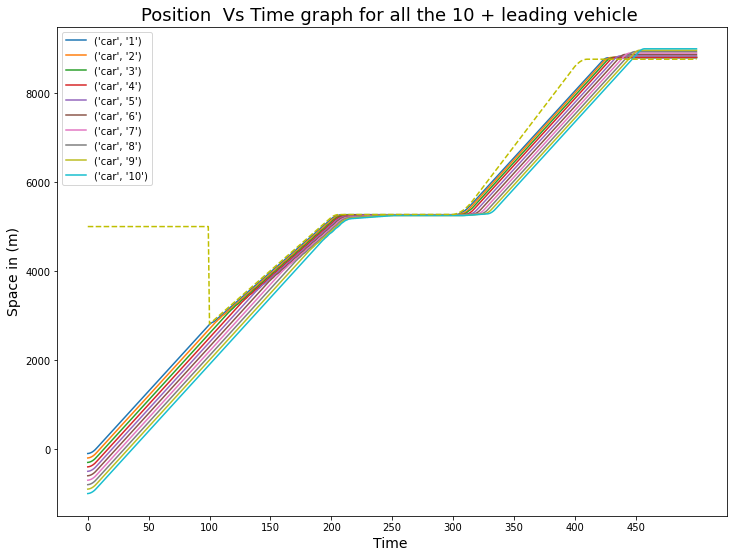

In [ ]:
plt.figure(figsize=(12,9))
value=0
for position in position_cols:
  plt.plot(df['time'],df[position],label=('car',str(value+1)))
  plt.legend()
  value=value+1
plt.plot(df['time'],df['x_(i-1)'],'y--') ## Plotting the leading vehicle graph wih the dotted lines.
plt.title('Position  Vs Time graph for all the 10 + leading vehicle ',fontsize=18)
plt.xticks(np.arange(0,500,50))
plt.xlabel('Time ',fontsize=14)
plt.ylabel('Space in (m)',fontsize=14)
plt.savefig('position_time_graph.jpg')

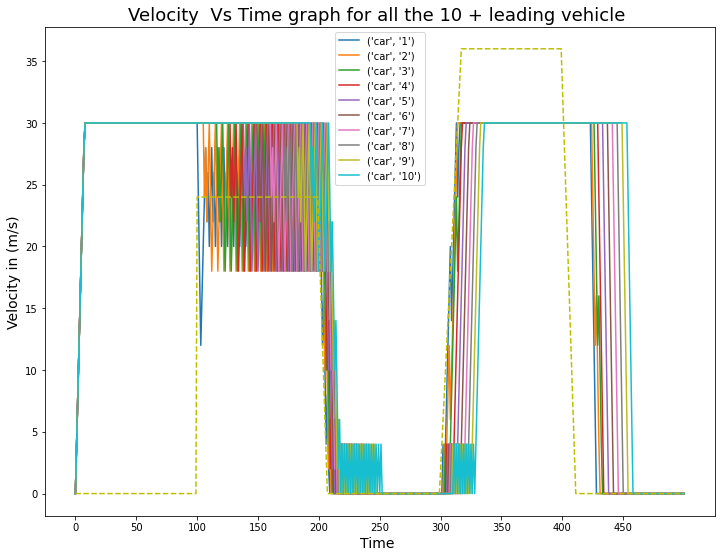

In [ ]:
plt.figure(figsize=(12,9))
value=0
for velocity in velocity_cols:
  plt.plot(df['time'],df[velocity],label=('car',str(value+1)))
  plt.legend()
  value=value+1
plt.plot(df['time'],df['v_(i-1)'],'y--') ## Plotting the leading vehicle graph wih the dotted lines.
plt.title('Velocity  Vs Time graph for all the 10 + leading vehicle ',fontsize=18)
plt.xticks(np.arange(0,500,50))
plt.xlabel('Time ',fontsize=14)
plt.ylabel('Velocity in (m/s)',fontsize=14)
plt.savefig('velocity_time_graph.jpg')

In [ ]:
df.to_csv('As_01_01.csv')

# Q-5 
##Repeat the above simulation using the GM car following model assuming that the 2nd car starts at 467 m. Use the parameters from the lecture slides.

### Using the parameters with τ = 1 s, α = 0.8, m = 0, l = 1, starting x = 467 m, and starting velocity is 30 m/s.


In [5]:
tau=1
alpha=0.8
m=0
l=1

In [6]:
path='/content/assignment_1/car_following (1).xlsx'
df2=pd.read_excel(path)

In [19]:
df2

,Time,"v(t,i-1)","x(t,i-1)","x(t,i)"
0,0,0,5000,-102.0
1,1,0,5000,NaN
2,2,0,5000,NaN
3,3,0,5000,NaN
4,4,0,5000,NaN
...,...,...,...,...
496,496,0,8762,NaN
497,497,0,8762,NaN
498,498,0,8762,NaN
499,499,0,8762,NaN


In [20]:
## creating a dictionary to store all the column names for corresponding vehicle
name={}
for value in range(1,11):
  name[value]=['x_i'+str(value),'s_i'+str(value),'v_i'+str(value),'a_i'+str(value)]
## Extracting all the names from it 
col_name=[]
for value in name.values():
  for item in value:
    col_name.append(item)
col_name;

In [21]:
## Now joining the following column names with the existig column names 
df2=pd.concat([df2.drop(columns=['x(t,i)'],axis=1),pd.DataFrame(columns=col_name)])## It requires only pandas obejct not Dataframe so we have converted the df into list

In [22]:
position_cols=[]
for col in df2.columns[df2.columns.str.startswith('x_i')]:
  position_cols.append(col)
velocity_cols=[]
for col in df2.columns[df2.columns.str.startswith('v_i')]:
  velocity_cols.append(col)
acc_cols=[]
for col in df2.columns[df2.columns.str.startswith('a_i')]:
  acc_cols.append(col)

In [23]:
## Assigning 0 values to all the newly added columns 
df2[col_name]=0

In [24]:
## Assigining the initial position values to all teh 10 position columns
i=467
for col in position_cols:
  df2[col][0]=i
  i=i-100
## Assigning the initial velocity to teh models so we have 
for col in velocity_cols:
  df2[col][0]=30 ## Assining initial velocity 

In [25]:
## for the first vehicle we have :
for rows in range(1,df2.shape[0]):
  for value in range(1,11):
    if value == 1:
      df2['v_i'+str(value)][rows]=max(0,df2['v_i'+str(value)][rows-1]+df2['a_i'+str(value)][rows])
      delta_v=df2['v(t,i-1)'][rows]-df2['v_i'+str(value)][rows]
      df2['x_i'+str(value)][rows]=df2['x_i'+str(value)][rows-1]+df2['v_i'+str(value)][rows]
      df2['s_i'+str(value)][rows]=df2['x(t,i-1)'][rows]-df2['x_i'+str(value)][rows]
      df2['a_i'+str(value)][rows+tau]=alpha*(df2['v_i'+str(value)][rows])*(delta_v)/(df2['s_i'+str(value)][rows])
    else :
      df2['v_i'+str(value)][rows]=max(0,df2['v_i'+str(value)][rows-1]+df2['a_i'+str(value)][rows])
      delta_v=df2['v_i'+str(value-1)][rows]-df2['v_i'+str(value)][rows]
      df2['x_i'+str(value)][rows]=df2['x_i'+str(value)][rows-1]+df2['v_i'+str(value)][rows]
      df2['s_i'+str(value)][rows]=df2['x_i'+str(value-1)][rows]-df2['x_i'+str(value)][rows]
      df2['a_i'+str(value)][rows+tau]=alpha*(df2['v_i'+str(value)][rows])*(delta_v)/(df2['s_i'+str(value)][rows])
      


In [26]:
df2

,Time,"v(t,i-1)","x(t,i-1)",x_i1,s_i1,v_i1,a_i1,x_i2,s_i2,v_i2,a_i2,x_i3,s_i3,v_i3,a_i3,x_i4,s_i4,v_i4,a_i4,x_i5,s_i5,v_i5,a_i5,x_i6,s_i6,v_i6,a_i6,x_i7,s_i7,v_i7,a_i7,x_i8,s_i8,v_i8,a_i8,x_i9,s_i9,v_i9,a_i9,x_i10,s_i10,v_i10,a_i10
0,0.0,0.0,5000.0,467,0,30,0,367,0,30,0,267,0,30,0,167,0,30,0,67,0,30,0,-33,0,30,0,-133,0,30,0,-233,0,30,0,-333,0,30,0,-433,0,30,0
1,1.0,0.0,5000.0,497,4503,30,0,397,100,30,0,297,100,30,0,197,100,30,0,97,100,30,0,-3,100,30,0,-103,100,30,0,-203,100,30,0,-303,100,30,0,-403,100,30,0
2,2.0,0.0,5000.0,527,4473,30,0,427,100,30,0,327,100,30,0,227,100,30,0,127,100,30,0,27,100,30,0,-73,100,30,0,-173,100,30,0,-273,100,30,0,-373,100,30,0
3,3.0,0.0,5000.0,557,4443,30,0,457,100,30,0,357,100,30,0,257,100,30,0,157,100,30,0,57,100,30,0,-43,100,30,0,-143,100,30,0,-243,100,30,0,-343,100,30,0
4,4.0,0.0,5000.0,587,4413,30,0,487,100,30,0,387,100,30,0,287,100,30,0,187,100,30,0,87,100,30,0,-13,100,30,0,-113,100,30,0,-213,100,30,0,-313,100,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496.0,0.0,8762.0,15347,-6585,30,0,15247,100,30,0,15147,100,30,0,15047,100,30,0,14947,100,30,0,14847,100,30,0,14747,100,30,0,14647,100,30,0,14547,100,30,0,14447,100,30,0
497,497.0,0.0,8762.0,15377,-6615,30,0,15277,100,30,0,15177,100,30,0,15077,100,30,0,14977,100,30,0,14877,100,30,0,14777,100,30,0,14677,100,30,0,14577,100,30,0,14477,100,30,0
498,498.0,0.0,8762.0,15407,-6645,30,0,15307,100,30,0,15207,100,30,0,15107,100,30,0,15007,100,30,0,14907,100,30,0,14807,100,30,0,14707,100,30,0,14607,100,30,0,14507,100,30,0
499,499.0,0.0,8762.0,15437,-6675,30,0,15337,100,30,0,15237,100,30,0,15137,100,30,0,15037,100,30,0,14937,100,30,0,14837,100,30,0,14737,100,30,0,14637,100,30,0,14537,100,30,0


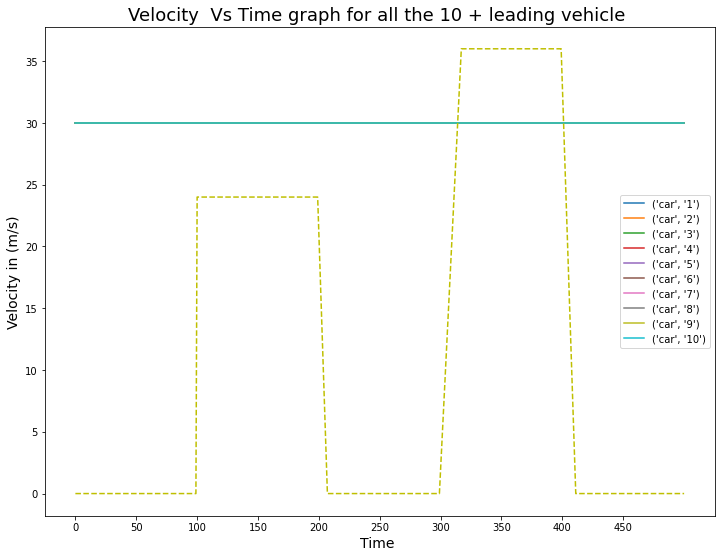

In [27]:
plt.figure(figsize=(12,9))
value=0
for velocity in velocity_cols:
  plt.plot(df2['Time'],df2[velocity],label=('car',str(value+1)))
  plt.legend()
  value=value+1
plt.plot(df2['Time'],df2['v(t,i-1)'],'y--') ## Plotting the leading vehicle graph wih the dotted lines.
plt.title('Velocity  Vs Time graph for all the 10 + leading vehicle ',fontsize=18)
plt.xticks(np.arange(0,500,50))
plt.xlabel('Time ',fontsize=14)
plt.ylabel('Velocity in (m/s)',fontsize=14)
plt.savefig('velocity_time_graph.jpg')

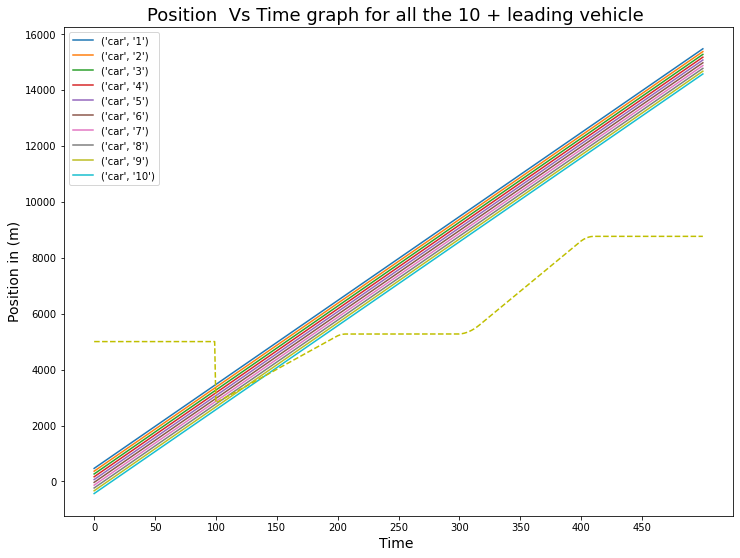

In [28]:
plt.figure(figsize=(12,9))
value=0
for position in position_cols:
  plt.plot(df2['Time'],df2[position],label=('car',str(value+1)))
  plt.legend()
  value=value+1
plt.plot(df2['Time'],df2['x(t,i-1)'],'y--') ## Plotting the leading vehicle graph wih the dotted lines.
plt.title('Position  Vs Time graph for all the 10 + leading vehicle ',fontsize=18)
plt.xticks(np.arange(0,500,50))
plt.xlabel('Time ',fontsize=14)
plt.ylabel('Position in (m)',fontsize=14)
plt.savefig('velocity_time_graph.jpg')